In [ ]:
#start of the code
import tensorflow as tf
import keras
import os
import keras
from keras.models import Sequential
#Sequential models are used in this project
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
#Since we are creating a neural network these libaries are needed
from sklearn.metrics import accuracy_score
#this is for checking the accuracy of the model



In [ ]:
import io
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import numpy as np # linear algebra

import matplotlib.pyplot as plt

Spliting the dataset




In [ ]:
#list for the images
XTrain = []
#list for the labels
YTrain = []
#input size for the VGG16 model
imageSize = 224
label = ['glioma_tumor', 'meningioma_tumor','no_tumor','pituitary_tumor']
# Iterate over labels
for z in label:
  #Getting the path for the labels(Training)
  path = os.path.join('/content/drive/MyDrive/BrainTumors/Training',z)# z here resembel the file names so that each iteration will assign the file name
  for a in os.listdir(path):
    #reading the images
     img = cv2.imread(os.path.join(path,a))
      #resizing it to 224
     img = cv2.resize(img,(imageSize,imageSize))
      #turning the images into gray scale
     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #adding the images into a list
     XTrain.append(img)
     #adding the images into a list
     YTrain.append(z)

#the code here does the same thing
  for z in label:
      path = os.path.join('/content/drive/MyDrive/BrainTumors/Testing',z)# z here resembel the file names so that each iteration will assign the file name
      for a in os.listdir(path):
        img = cv2.imread(os.path.join(path,a))
        img = cv2.resize(img,(imageSize,imageSize))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        XTrain.append(img)
        YTrain.append(z)

#converts the images and labels into arrrays
XTrain = np.array(XTrain)
YTrain = np.array(YTrain)




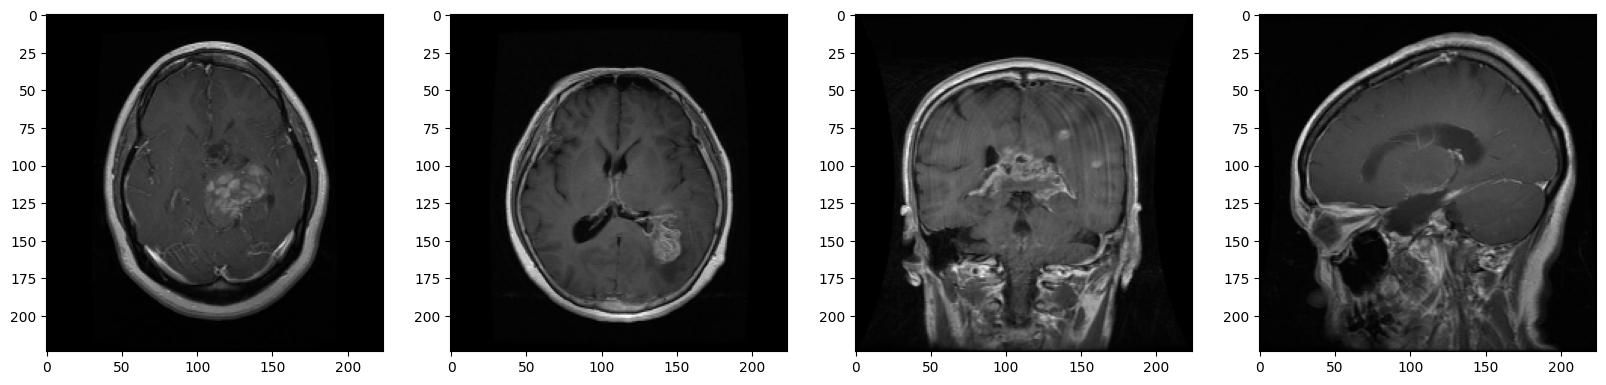

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
#create a 1x4 plot with 20x20 figsize
plt.subplots(figsize=(20, 20),ncols=4)
#iterate over four images from Xtrain
for i in range(4):
  #create a subplot in the grid with the position of i + 1
    plt.subplot(1, 4, i+1)
    #display the image in grayscale
    plt.imshow(XTrain[i], cmap="gray")
    #turn on the axis
    plt.axis('on')
plt.show()


In [ ]:
## Shuffle the XTrain and YTrain datasets using a random state for reproducibility
XTrain,YTrain = shuffle(XTrain,YTrain,random_state=101)
#prints the shape of Xtrain
#XTrain contains 4446 images that are all 224x224
XTrain.shape

(4446, 224, 224)

In [ ]:
#spliting of the dataset with a10% test Size
XTrain,XTest,YTrain,YTest = train_test_split(XTrain,YTrain,test_size=0.1,random_state=101)
print("Shape of X Train is",XTrain.shape)
print("Shape of X Test is",XTest.shape)

Shape of X Train is (4001, 224, 224)
Shape of X Test is (445, 224, 224)


In [ ]:
#change the labels in catagorical variables
#0 = glioma_tumor
#1 = meningioma_tumor
#2 = no_tumor
#3 = no_tumor
#intializtion of empty lists for the labels
YTrain_2 = []
YTest_2 = []
#convert the labels into numercal values
for a in YTrain:
  YTrain_2.append(label.index(a))
YTrain = YTrain_2
# Convert numerical indices to one-hot encoded representations for YTrain
YTrain = tf.keras.utils.to_categorical(YTrain)

for a in YTest:
  YTest_2.append(label.index(a))
YTest = YTest_2
YTest = tf.keras.utils.to_categorical(YTest)



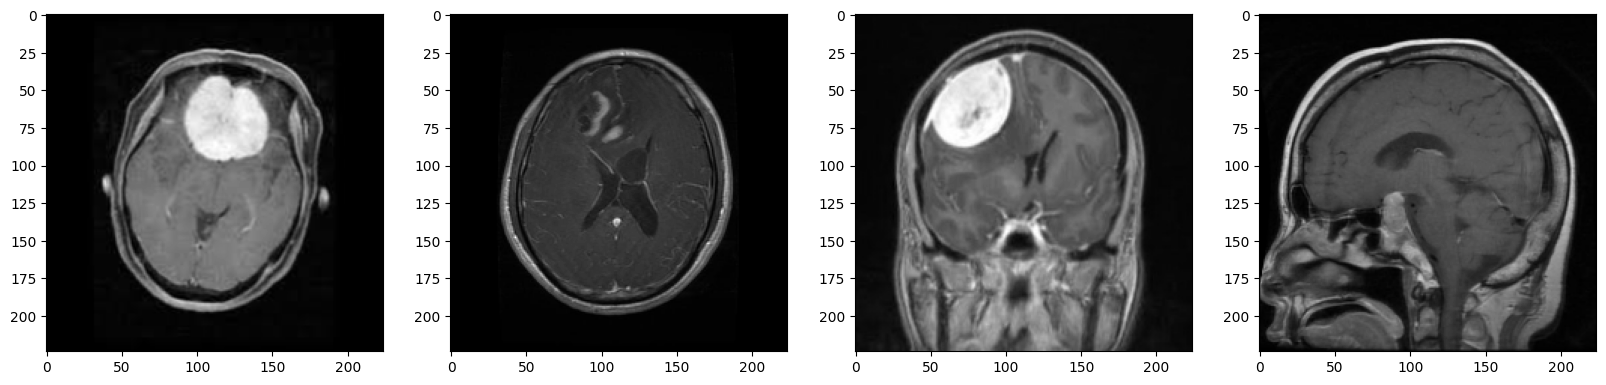

In [ ]:
%matplotlib inline
#similar concept to the one explain above
plt.subplots(figsize=(20, 20),ncols=4)
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(XTrain[i], cmap="gray")

    plt.axis('on')
plt.show()

Neural Network desgin


In [ ]:
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,MaxPooling2D,Dropout

#VGG16 Model
Network = Sequential()
# Add the first two convolutional layers with 64 filters and 3x3 kernel size
Network.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
Network.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#Adding a max pooling layer
Network.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Add two more convolutional layers with 128 filters and a max pooling layer
Network.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
Network.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
Network.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Add three convolutional layers with 256 filters and a max pooling layer
Network.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
Network.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
Network.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
Network.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Add three convolutional layers with 512 filters and a max pooling layer
Network.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
Network.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
Network.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
Network.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Add two convolutional layers with 512 filters and a max pooling layer
Network.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
Network.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
Network.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
Network.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# Flatten the feature maps into a single 1D array
Network.add(Flatten())

# Add two fully connected layers with 4096 units and ReLU activation
Network.add(Dense(units=4096,activation="relu"))
Network.add(Dense(units=4096,activation="relu"))
# Add the output layer with 4 units and softmax activation
Network.add(Dense(units=4, activation="softmax"))

Network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
#.compile the model
#Use categorical crossentropy loss for multi-class classification
# Use the Adam optimizer for training# Evaluate the model using accuracy metric
Network.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [ ]:
# Train the VGG16 model and Training data and labels
hist = Network.fit(XTrain,YTrain,epochs=20,validation_split=0.1)

Epoch 1/20
113/113 [==============================] - 83s 482ms/step - loss: 69.8957 - accuracy: 0.2842 - val_loss: 1.3700 - val_accuracy: 0.2618
Epoch 2/20
113/113 [==============================] - 47s 414ms/step - loss: 1.4232 - accuracy: 0.2764 - val_loss: 1.3730 - val_accuracy: 0.2618
Epoch 3/20
113/113 [==============================] - 47s 415ms/step - loss: 1.3737 - accuracy: 0.2839 - val_loss: 1.3725 - val_accuracy: 0.2618
Epoch 4/20
113/113 [==============================] - 46s 409ms/step - loss: 1.3724 - accuracy: 0.2983 - val_loss: 1.3390 - val_accuracy: 0.3666
Epoch 5/20
113/113 [==============================] - 47s 418ms/step - loss: 1.2908 - accuracy: 0.3819 - val_loss: 1.2198 - val_accuracy: 0.4539
Epoch 6/20
113/113 [==============================] - 47s 418ms/step - loss: 1.1761 - accuracy: 0.4597 - val_loss: 1.0509 - val_accuracy: 0.5786
Epoch 7/20
113/113 [==============================] - 46s 409ms/step - loss: 1.1496 - accuracy: 0.4703 - val_loss: 1.1067 - val_a

In [ ]:
#save the network
Network.save('/content/drive/MyDrive/BrainTumors/Vgg16_2.0.h5')

Visulization


In [ ]:
#import libaries
import numpy as np
from keras.models import Model
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

In [ ]:
#preprocces the image

imagePath = '/content/drive/MyDrive/BrainTumors/Training/meningioma_tumor/m (100).jpg'
# Load the image using OpenCV and resize it to the desired size
image = cv2.imread(imagePath)
image = cv2.resize(image, (224, 224))

# Convert the image to grayscale
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Add a third dimension to the grayscale image to mimic a single-channel color image
image = np.expand_dims(image, axis=0)

# Preprocess the image using the VGG16 preprocessing function
image = preprocess_input(image)

In [ ]:
# Extract the output tensors of each layer in the VGG16 model (Network)
layer_outputs = [layer.output for layer in Network.layers]

# Create a new activation model with the same input as the VGG16 model
# and the extracted layer outputs
activation_model = Model(inputs=Network.input, outputs=layer_outputs)

In [ ]:
# Use the activation model to predict the activations of each layer in the VGG16 model for the input image
activations = activation_model.predict(image)

1/1 [==============================] - 1s 756ms/step


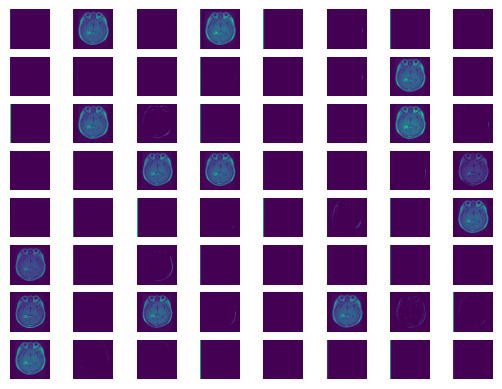

In [ ]:
# Function to visualize feature maps of a specific layer
def display_feature_maps(layer_number, activations):
    layer_activations = activations[layer_number] # Get activations for the specified layer
    num_channels = layer_activations.shape[-1] # Determine the number of channels in the feature map

    grid_size = int(np.ceil(np.sqrt(num_channels))) # Calculate the grid size for displaying feature maps

    # Loop through each channel in the feature map
    for i in range(num_channels):
        plt.subplot(grid_size, grid_size, i + 1) # Create a subplot for each channel
        plt.imshow(layer_activations[0, :, :, i], cmap='viridis') # Display the feature map for the current channel
        plt.axis('off') # Hide axis labels and ticks

    plt.show() # Show the complete grid of feature maps

# Specify the layer number you want to visualize
layer_number = 1
# Call the display_feature_maps function with the chosen layer number and activations
display_feature_maps(layer_number, activations)

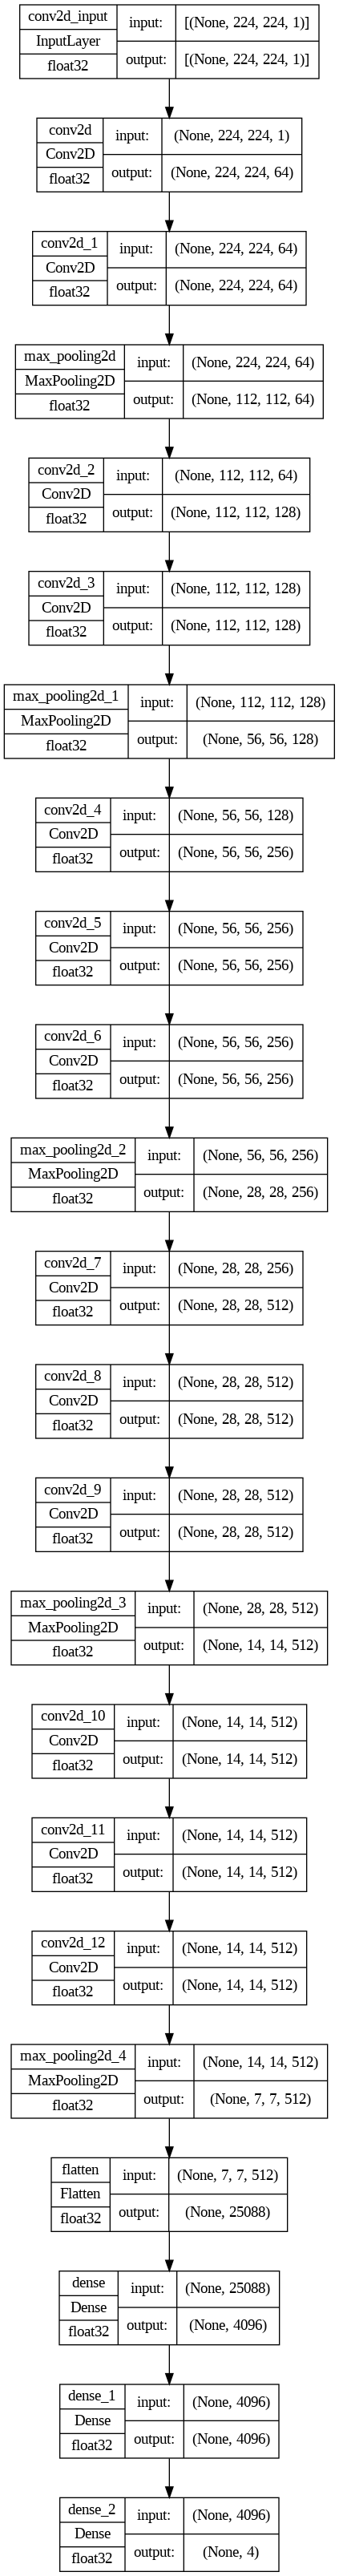

In [ ]:
#This code plots the Model
from tensorflow.keras.utils import plot_model
plot_model(Network, to_file='Network.png', show_shapes=True, show_dtype=True)


In [ ]:
from PIL import Image

image = Image.open('Network.png')
image.save("/content/drive/MyDrive/BrainTumors/Network.png")

Results


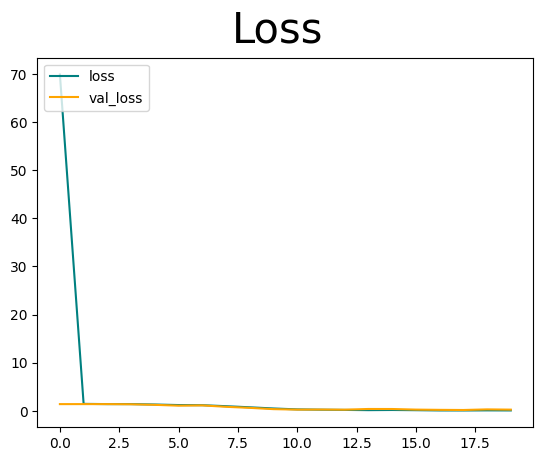

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure for the plot
figure = plt.figure()

# Plot the training loss with teal color and label it as 'loss'
plt.plot(hist.history['loss'], color='teal', label='loss')

# Plot the validation loss with orange color and label it as 'val_loss'
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')

# Set the title of the plot to 'Loss' with a font size of 30
figure.suptitle('Loss', fontsize=30)

# Add a legend to the plot in the upper left corner
plt.legend(loc="upper left")

# Display the plot
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

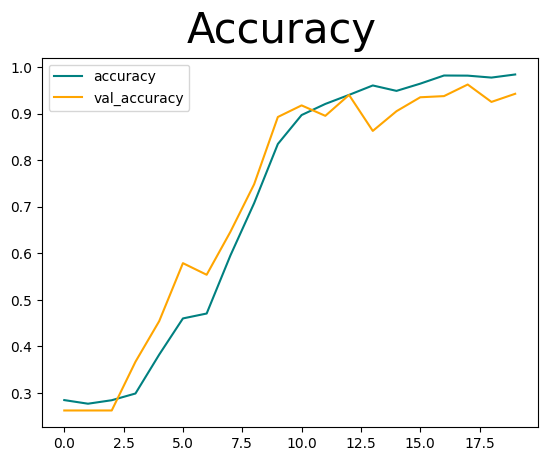

In [ ]:
#similar to the above but it visulizes the accuracy
figure = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
figure.suptitle('Accuracy',fontsize = 30)
plt.legend(loc = "upper left")
plt.show

In [ ]:
from tensorflow.keras.models import load_model
#uses the package load model to load our saved model
new_model = load_model('/content/drive/MyDrive/BrainTumors/Vgg16_2.0.h5')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
predic=new_model.predict(XTest)
predic = np.argmax(predic,axis=1)
YTest = np.argmax(YTest,axis=1)


print(classification_report(YTest,predic))

14/14 [==============================] - 257s 18s/step
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       126
           1       0.95      0.92      0.94       133
           2       0.97      0.90      0.94        81
           3       0.95      1.00      0.98       105

    accuracy                           0.95       445
   macro avg       0.95      0.94      0.95       445
weighted avg       0.95      0.95      0.95       445



<ipython-input-13-15817251020d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + label, fontsize=10)
<ipython-input-13-15817251020d>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + label, fontsize=10)


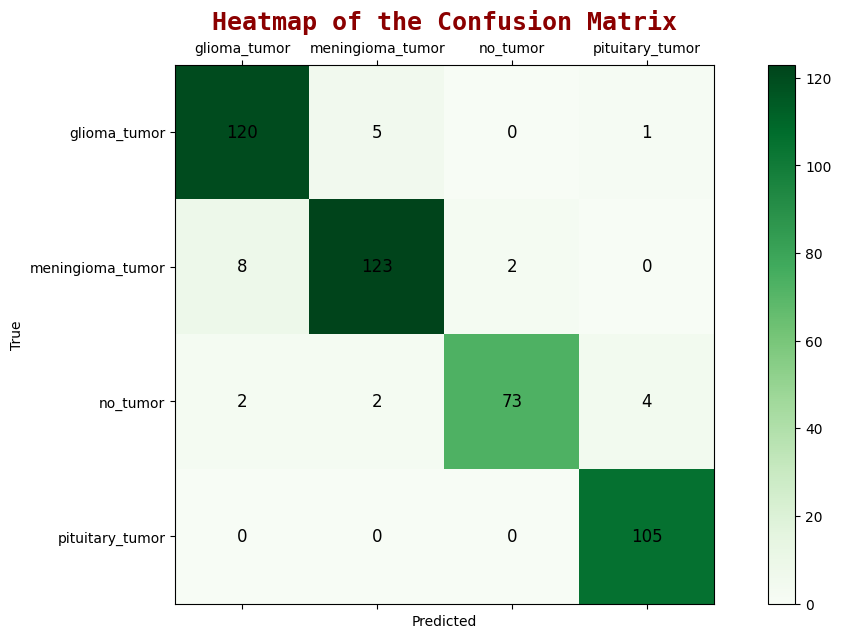

In [ ]:


# Generate the confusion matrix
cm = confusion_matrix(YTest, predic)

fig, ax = plt.subplots(figsize=(14, 7))

# Display the heatmap using Matplotlib
cax = ax.matshow(cm, cmap=plt.cm.Greens)

# Add colorbar for better visualization
fig.colorbar(cax)

# Set x and y-axis labels
ax.set_xticklabels([''] + label, fontsize=10)
ax.set_yticklabels([''] + label, fontsize=10)

# Add values to the heatmap
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', fontsize=12, color='black')

plt.title('Heatmap of the Confusion Matrix', size=18, fontweight='bold', fontname='monospace', color='darkred', y=1.05)
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()


Prediction


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix

# Load and preprocess the images
imgPaths = ['/content/drive/MyDrive/BrainTumors/Testing/pituitary_tumor/image(30).jpg',
            '/content/drive/MyDrive/normal-brain-mri-5.png',
            '/content/drive/MyDrive/BrainTumors/Testing/no_tumor/image(56).jpg']
imgs = []
for path in imgPaths:
    img = cv2.imread(path)
    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.array(img).reshape(1, 224, 224)
    imgs.append(img)
imgs = np.concatenate(imgs, axis=0)
imgs.shape



(3, 224, 224)

1/1 [==============================] - 2s 2s/step


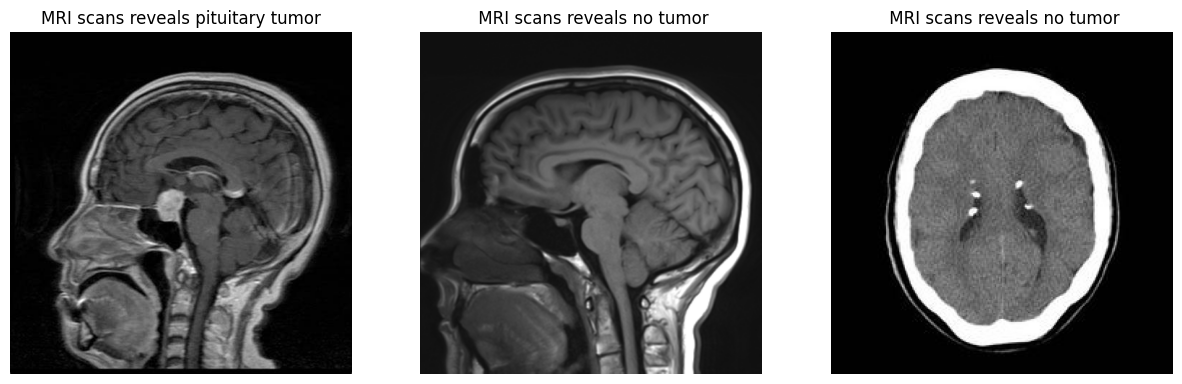

In [ ]:

# Make predictions on the batch of images
predictions = new_model.predict(imgs)

y_pred = []

# Print the label for each image
fig, axes = plt.subplots(nrows=1, ncols=len(imgPaths), figsize=(15, 15))
for i, prediction in enumerate(predictions):
    labels = prediction.argmax()
    if labels == 0:
        label = 'MRI scans reveals glioma tumor'
    elif labels == 1:
        label = 'MRI scans reveals meningioma tumor'
    elif labels == 2:
        label = ' MRI scans reveals no tumor'
    elif labels == 3:
        label = 'MRI scans reveals pituitary tumor'


    y_pred.append(labels)
    img = cv2.imread(imgPaths[i])
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(label)
plt.show()

In [ ]:
pip install anvil-uplink

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=167c0bbf83d62576bfa40bbae33f924f68b16848279ee11cd7ed6da80e064a38
  Stored in directory: /root/.cache/pip/wheels/e8/9d/fd/0a594a1bc8d493935d319ac40d64d79f5b4117ef4d37b1b678
Successfully built ws4py


In [ ]:
import anvil.server

anvil.server.connect("server_OORBVAKQI4LFJKLJWQWM3FGF-ZTVGGLCOEUTHYZJN")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [ ]:
import anvil.media
@anvil.server.callable
@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as f:
        # Preprocess the image
        img = cv2.imread(f)
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = np.array(img).reshape(1, 224, 224)

        # Classify the image
        prediction = new_model.predict(img)
        label_index = prediction.argmax()

        # Assign the label based on the prediction
        if label_index == 0:
            label = 'MRI scans reveals glioma tumor'
        elif label_index == 1:
            label = 'MRI scans reveals meningioma tumor'
        elif label_index == 2:
            label = 'MRI scans reveals no tumor'
        elif label_index == 3:
            label = 'MRI scans reveals pituitary tumor'

        return label

